In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
feature_path = r"Data\bank_subset.csv"
label_path = r"Data\bank_subset_label.csv"

In [3]:
bank_full = pd.read_csv(feature_path)
bank_full_labels = pd.read_csv(label_path)
bank_full.head()

age  balance  duration  campaign  pdays  housing_cat  poutcome_success
0   59     2343      1042         1  10000            1                 0
1   56       45      1467         1  10000            0                 0
2   41     1270      1389         1  10000            1                 0
3   55     2476       579         1  10000            1                 0
4   54      184       673         2  10000            0                 0

In [4]:
bank_full_labels.head()

deposit_cat
0            1
1            1
2            1
3            1
4            1

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pydotplus

In [6]:
data_train, data_test, label_train, label_test = train_test_split(bank_full, bank_full_labels, test_size=0.2, random_state=6)

In [22]:
dt2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=2)

In [23]:
dt2.fit(data_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

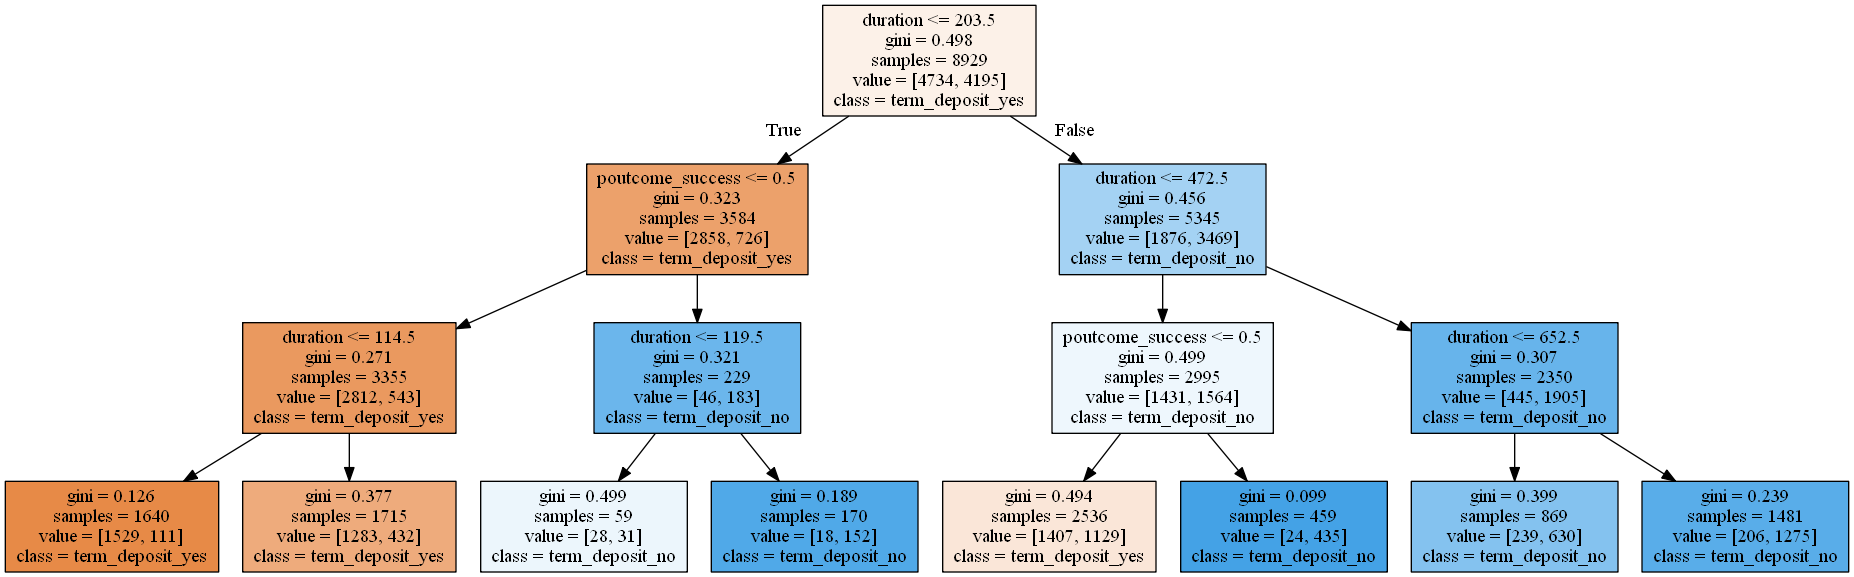

In [73]:
dot_data = export_graphviz(dt2, out_file=None, feature_names=bank_full.columns, filled=True, class_names=['term_deposit_yes','term_deposit_no'])
graph_big = pydotplus.graph_from_dot_data(dot_data)
Image(graph_big.create_png())

In [62]:
dt2 = tree.DecisionTreeClassifier(max_depth=3)

In [63]:
dt2.fit(data_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [64]:
dt2_score_train = dt2.score(data_train, label_train)
print(dt2_score_train)

0.7550677567476761


In [65]:
dt2_score_test = dt2.score(data_test, label_test)
print(dt2_score_test)

0.7586206896551724


In [66]:
dt4 = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=6)
dt4.fit(data_train, label_train)
dt4_score_train = dt4.score(data_train, label_train)
dt4_score_test = dt4.score(data_test, label_test)
print(dt4_score_train, dt4_score_test)

0.7842983536790235 0.7984773846842812


In [68]:
dt_full = tree.DecisionTreeClassifier(criterion='entropy', random_state=6)
dt_full.fit(data_train, label_train)
dt_full_score_train = dt_full.score(data_train, label_train)
dt_full_score_test = dt_full.score(data_test, label_test)
print(dt_full_score_train, dt_full_score_test)

1.0 0.7344379758172862


In [70]:
dot_data = export_graphviz(dt_full, out_file=None, feature_names=bank_full.columns, filled=True, class_names=['term_deposit_yes','term_deposit_no'])
graph_big = pydotplus.graph_from_dot_data(dot_data)
Image(graph_big.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.383576 to fit



In [71]:
dt_msl = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=100)
dt_msl.fit(data_train, label_train)
dt_msl_score_train = dt_msl.score(data_train, label_train)
dt_msl_score_test = dt_msl.score(data_test, label_test)
print(dt_msl_score_train, dt_msl_score_test)

0.8102811065068877 0.812360053739364


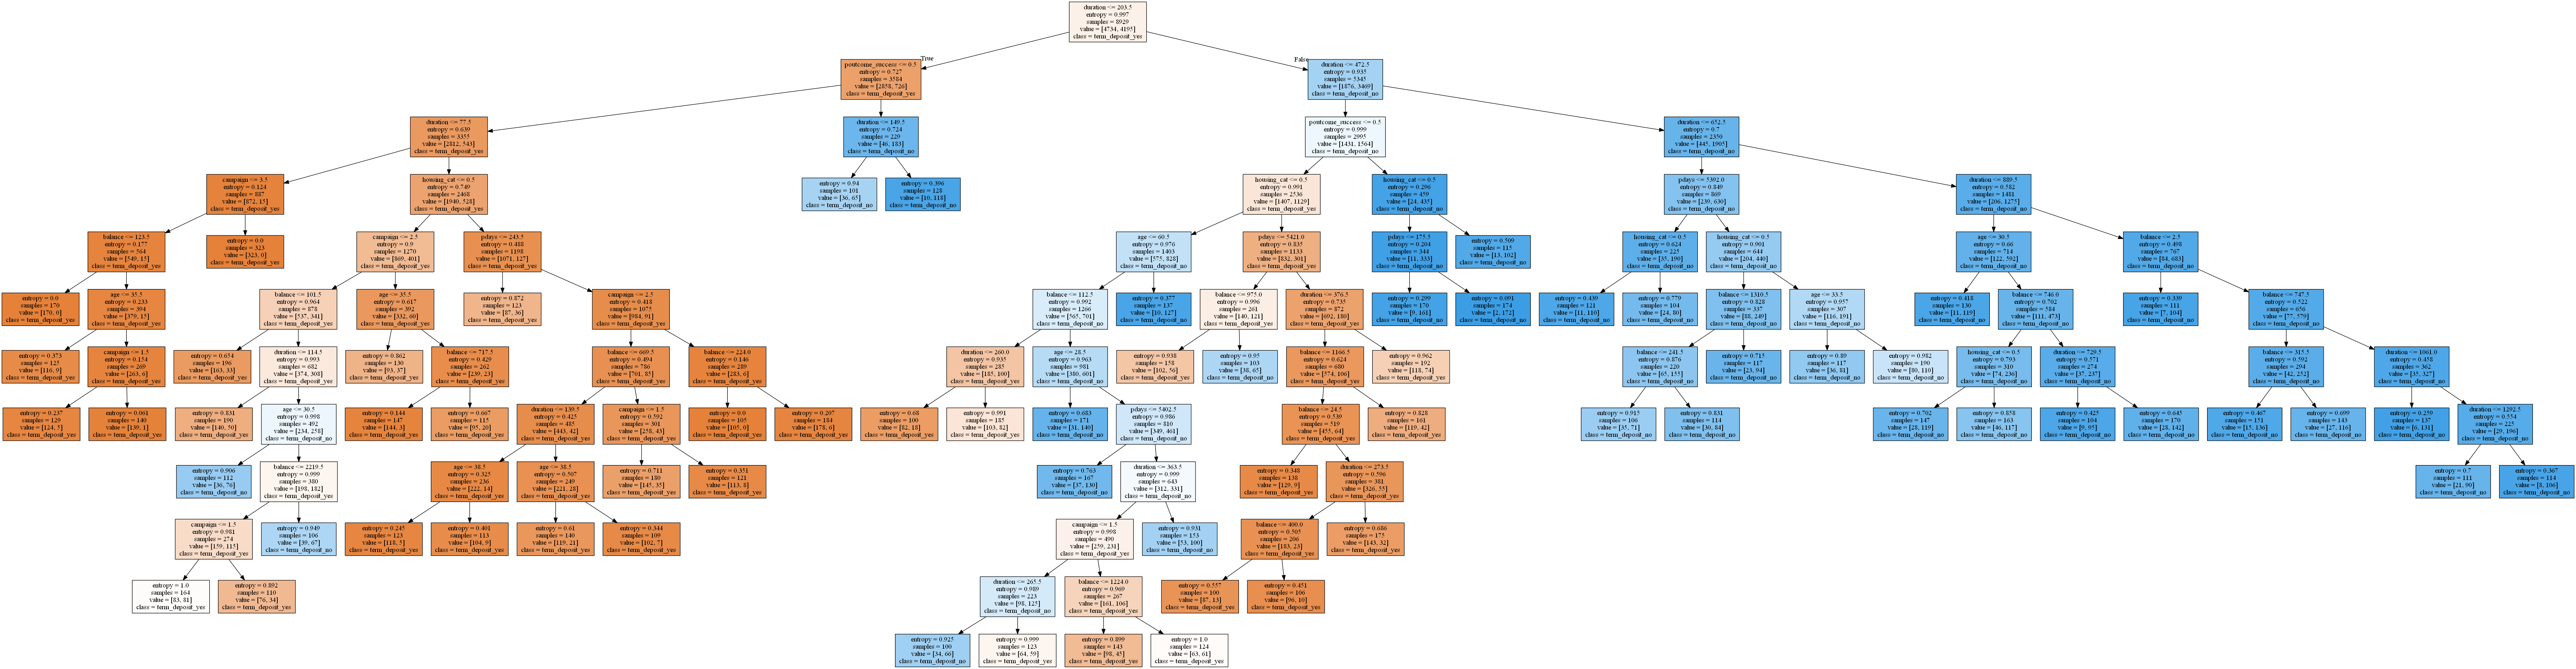

In [72]:
dot_data = export_graphviz(dt_msl, out_file=None, feature_names=bank_full.columns, filled=True, class_names=['term_deposit_yes','term_deposit_no'])
graph_big = pydotplus.graph_from_dot_data(dot_data)
Image(graph_big.create_png())

# Assignment

In [74]:
path = r"Data\cleaned_loan_data.csv"

In [169]:
data = pd.read_csv(path)
data.head()

customer.id credit.policy             purpose int.rate  installment  \
0       LA001           Yes  debt_consolidation   11.89%       829.10   
1       LA002           Yes         credit_card   10.71%       228.22   
2       LA003           Yes  debt_consolidation   13.57%       366.86   
3       LA004           Yes  debt_consolidation   10.08%       162.34   
4       LA005           Yes         credit_card   14.26%       102.92   

   log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0       11.350407  19.48   737        5639.958333      28854        52.1   
1       11.082143  14.29   707        2760.000000      33623        76.7   
2       10.373491  11.63   682        4710.000000       3511        25.6   
3       11.350407   8.10   712        2699.958333      33667        73.2   
4       11.299732  14.97   667        4066.000000       4740        39.5   

   pub.rec inq.last.6mths delinq.2yrs paid.back.loan  
0        0    Less than 5          No            Yes  
1        0    Less than 5          No            Yes  
2        0    Less than 5          No            Yes  
3        0    Less than 5          No            Yes  
4        0    Less than 5         Yes            Yes

In [170]:
X = data.drop(columns=['customer.id', 'paid.back.loan'])
y = data['paid.back.loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

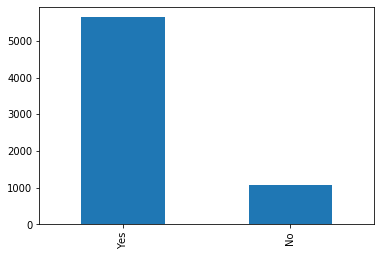

In [171]:
fully_paid = y_train.value_counts()
fully_paid.plot(kind='bar')

In [172]:
from sklearn.preprocessing import LabelEncoder

In [173]:
X_train['int.rate'] = X_train['int.rate'].apply(lambda x:(float(x[:-1]))/100)
X_test['int.rate'] = X_test['int.rate'].apply(lambda x:(float(x[:-1]))/100)

C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [174]:
num_df = X_train.select_dtypes(include=np.number)
cat_df = X_train.select_dtypes(include=np.object)

In [175]:
cat_df.get_dtype_counts()

object    4
dtype: int64

In [176]:
cols = list(num_df.columns)
type(cols)

list

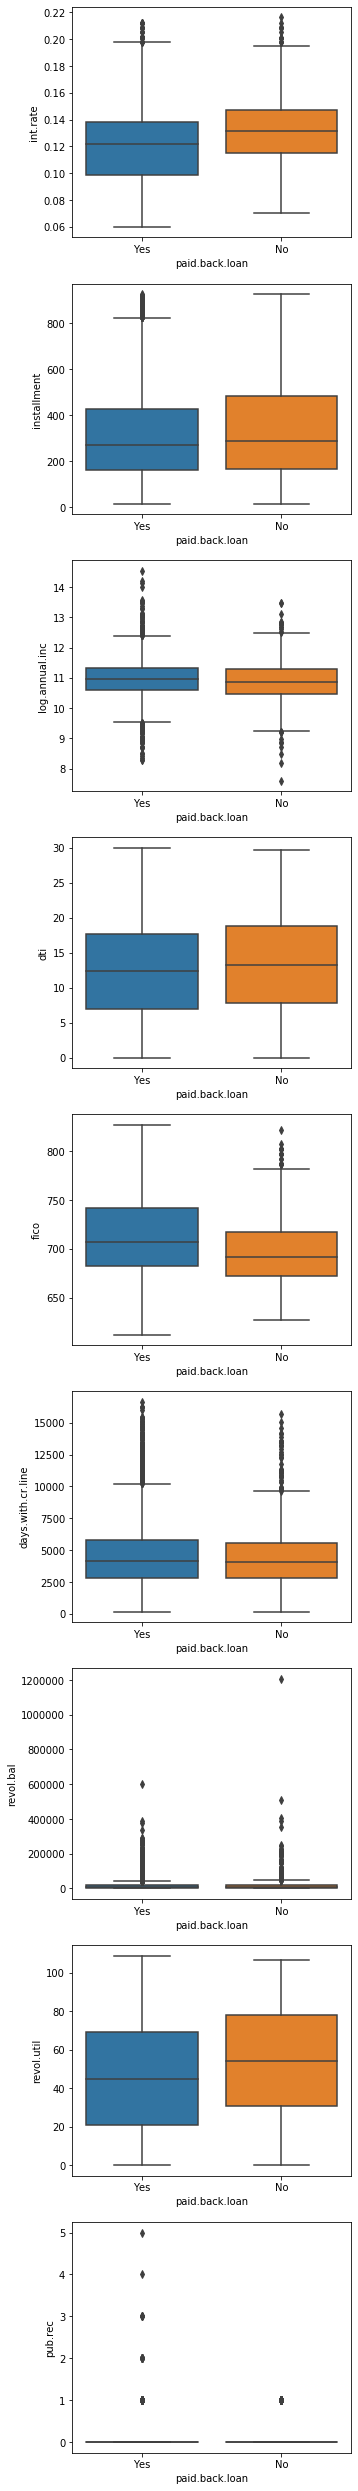

In [177]:
fig, axes = plt.subplots(9,1,figsize=[5,45])
for i in range(9):
    sns.boxplot(x=y_train, y=num_df[cols[i]], ax=axes[i])

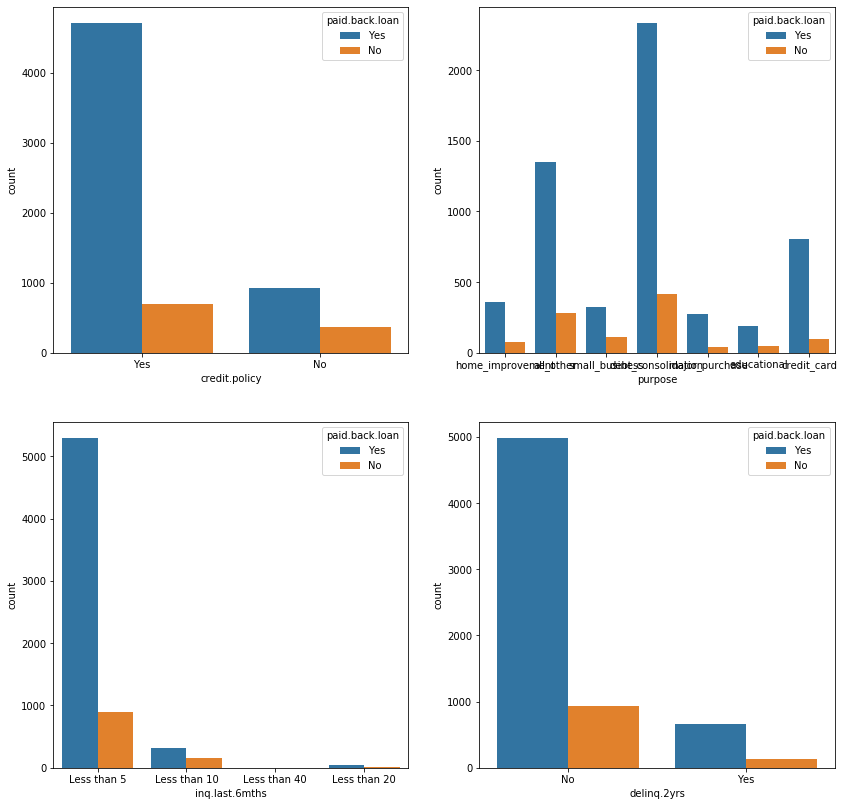

In [178]:
cols = list(cat_df.columns)
fig, axes = plt.subplots(2,2, figsize=[14,14])
for i in range(2):
    for j in range(2):
        sns.countplot(x=X_train[cols[i*2+j]], hue=y_train, ax=axes[i,j])

In [179]:
for col in cat_df.columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [185]:
y_train = y_train.apply(lambda x: 1 if x.lower()=='yes' else 0)
y_test = y_test.apply(lambda x: 1 if x.lower()=='yes' else 0)

In [189]:
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print(acc)

0.7334725121781489


In [191]:
from sklearn.model_selection import GridSearchCV

In [192]:
parameter_grid = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)}

In [197]:
model_2 = tree.DecisionTreeClassifier(random_state=0)
p_tree = GridSearchCV(estimator=model_2, param_grid=parameter_grid, cv=5)
p_tree.fit(X_train, y_train)
acc_2 = p_tree.score(X_test, y_test)
print(acc_2)

0.837160751565762


In [198]:
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pydotplus

In [199]:
dot_data = export_graphviz(decision_tree=p_tree.best_estimator_, out_file=None, feature_names=X.columns, filled=True, class_names=['loan_paid_back_yes','loan_paid_back_no'])

In [200]:
graph_big = pydotplus.graph_from_dot_data(dot_data)

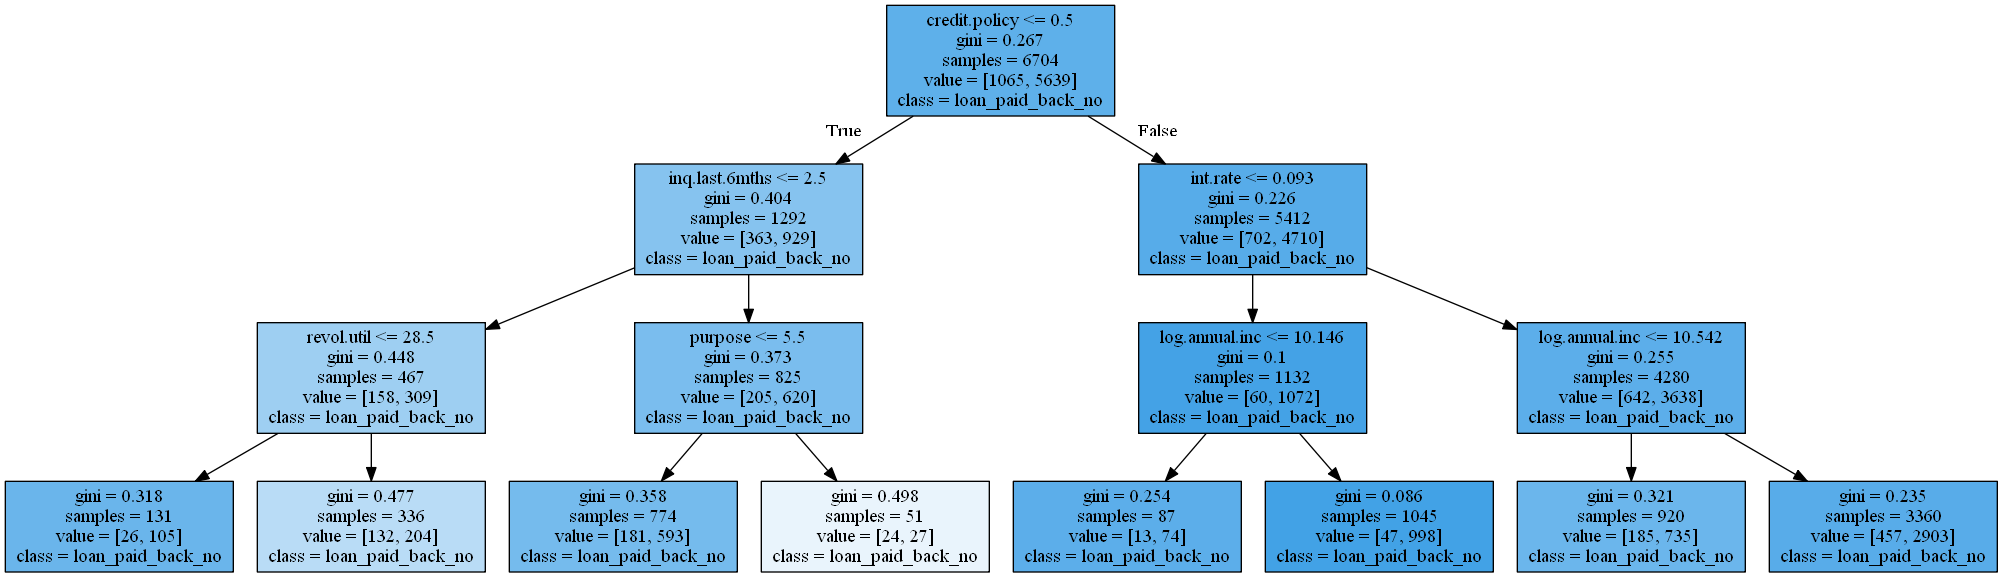

In [201]:
Image(graph_big.create_png())